# Python Taller 5 - Método de sobre-relajación sucesiva (SOR)

## IIQ2003 - Fenómenos de Transporte

Departamento de Ingeniería Química y Bioprocesos

Pontificia Universidad Católica de Chile

Profesor: Felipe Huerta


* **Aplicación**: Resolución de los sistemas de ecuaciones lineales resultantes al aplicar el método de diferencias finitas a ecuaciones diferenciales parciales  (EDP) **lineales**. Estas EDP típicamente provenien de problemas de transporte en dos dimensiones en estado estacionario.

* **Ejemplo**: Perfil de temperatura para un fluido newtoniano circulando en regimen laminar dentro de una tubería circular.

### El método de sobre-relajación sucesiva

**Agradecimientos**: La siguiente descripción del método de sobre-relajación sucesiva está adaptada a partir del curso gratuito en línea construido por el Prof. Matt Piggott y su equipo de ayudantes del Departamento de Ciencias de la Tierra e Ingeniería de Imperial College London. Matt fue mi examinador de mi examen de candidatura (*late stage review*).

https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/6_Solving_PDEs_SOR.html


### Ecuaciones Diferenciales Parciales y Fenómenos de Transporte

La mayoría de los sistemas físicos existentes están gobernados por las ecuaciones de conservación de momentum, masa y calor. Si estos sistemas se asumen **continuos**, es posible escribir las ecuaciones de conservación como ecuaciones diferenciales parciales (EDP). Las EDP son típicamente muy difíciles de resolver.

En la bibliografía de pregrado de Fenómenos de Transporte, típicamente se estudian sistemas unidimensionales en estado estacionario. Esto permite simplificar enormemente las EDP, sin embargo estos métodos están restringidos para aquellos casos en que se cumplen supuestos muy fuertes que muchas veces no son realistas. Por otra parte, la bibliografía de postgrado de Fenómenos de Transporte requiere desarrollar competencias matemáticas de muy alto nivel. Estas competencias permiten resolver un nuevo subconjunto de problemas (no estacionarios, 2D y 3D), pero también bajo supuestos bastante restrictivos. 

### Método de sobre-relajación sucesiva

El método de sobre-relajación sucesiva (o successive over-relaxation, *SOR* por sus siglas en inglés) es un método numérico para resolver **sistemas de ecuaciones lineales** que tienen una **combinación lineal** de términos diferenciales. Los coeficientes en aquellas ecuaciones pueden ser funciones de las variables independientes pero no de las variables dependientes. 

Por ejemplo, la EDP

$$f_1(x,y)\frac{\partial u}{\partial x} +f_2(x,y)\frac{\partial u}{\partial y}+f_3(x,y)u=f_4(x,y) $$

Podría resolverse utilizando el método de sobre-relajación sucesiva ya que ninguna de las funciones $f_i$, $i=1..4$ es función de la variable dependiente $u$.

Por ejemplo en la **Clase 12** se derivó que la ecuación que gobierna al perfil de velocidad para convección forzada de calor en un tubo circular es:

$$ \rho \hat{c}_p v_{max} \left(1- \left( \frac{r}{R} \right)^2 \right) \frac{\partial T}{\partial z} = k \left[ \frac{1}{r} \frac{\partial}{\partial r}  \left( r \frac{\partial T}{\partial r} \right)  + \frac{\partial^2 T}{\partial z^2} \right] $$

Al desarrollar la derivada del lado derecho, restando el lado derecho a ambos lados de la ecuación y reordenando términos, es posible escribir la EDP de la forma:

$$ 
k \frac{\partial^2 T}{\partial r ^2} + k \frac{\partial^2 T}{\partial z ^2} + \frac{k}{r} \frac{\partial T}{\partial r} - \rho \hat{c}_p v_{max} \left(1- \left( \frac{r}{R} \right)^2 \right) \frac{\partial T}{\partial z} = 0
$$ 

En donde todos los términos que multiplican a las derivadas espaciales de la temperatura son constantes o funciones de la variable independiente $r$.

#### EDP lineales de segundo orden en dos dimensiones

Una EDP lineal de segundo orden en dos dimensiones puede convertirse en un sistema de ecuaciones lineales utilizando diferencias finitas. Al discretizar el espacio **en dos dimensiones**, se obtiene un sistema de ecuaciones lineales cuya estructura es:

$$a_{i,j}u_{i+1,j}+b_{i,j}u_{i-1,j}+c_{i,j}u_{i,j+1}+d_{i,j}u_{i,j-1}+e_{i,j}u_{i,j}=f_{i,j},$$

Donde los prefactores $(a,b,c,d,e)$ y $f$ son matrices (funciones de la posición). El sistema de ecuaciones lineales es válido para todos los nodos interiores, $i = 2.. N_i$, $j = 2..N_j$.

Por ejemplo, al aplicar el método de diferencias finitas a la EDP asociada a la convección forzada de calor para flujo laminar en una tubería circular, se obtiene:

$$\begin{align} 
0 &= k \left( \frac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{\Delta r^2} \right) +
k \left( \frac{T_{i,j+1} - 2T_{i,j} + T_{i,j-1}}{\Delta z^2} \right)  +
\frac{k}{r_i} \left( \frac{T_{i,j} - T_{i-1,j}}{\Delta r} \right) \\
&- \rho \hat{c}_p v_{max} \left(1- \left( \frac{r_i}{R} \right)^2 \right) \left( \frac{T_{i,j} - T_{i,j-1}}{\Delta z} \right)
\end{align}$$

Una vez obtenida la forma discretizada de la EDP, el siguiente paso es agrupar términos para convertirlos a la estructura general necesaria para aplicar SOR. Esto permite encontrar los coeficientes que multiplican a la variable dependiente en los distintos nodos del reticulado:


$$ 
\begin{align}
0 &= \left( \frac{k}{\Delta r^2}\right) T_{i+1,j} + \left( \frac{k}{\Delta r^2} - \frac{k}{r_i \Delta r} \right) T_{i-1,j}    + \frac{k}{\Delta z^2} T_{i,j+1}+ \left( \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{k}{\Delta z^2} \right) T_{i,{j-1}} \\
&+ \left(\frac{-2k}{\Delta r^2} -\frac{2k}{\Delta z^2} + \frac{k}{r_i \Delta r}  - \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) \right) T_{i,j}
\end{align}
$$

De donde se obtienen los coeficientes

$$a_{ij} =  \frac{k}{\Delta r^2} $$

$$b_{ij} = \frac{k}{\Delta r^2} - \frac{k}{r_i \Delta r} $$

$$c_{ij} = \frac{k}{\Delta z^2} $$

$$ d_{ij} = \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{k}{\Delta z^2}  $$

$$ e_{ij} = \frac{-2k}{\Delta r^2} + \frac{k}{r_i \Delta r}  - \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{-2k}{\Delta z^2}$$

$$ f_{ij} = 0 $$

#### El algoritmo SOR

A partir de la aproximación de diferencias finitas,

$$ a_{i,j}u_{i+1,j}^{correcto}+b_{i,j}u_{i-1,j}^{correcto}+c_{i,j}u_{i,j+1}^{correcto}+d_{i,j}u_{i,j-1}^{correcto}+e_{i,j}u_{i,j}^{correcto}-f_{i,j}=0.$$

Se define la matriz de residuos $\xi_{i,j}$ como el valor del lado derecho de la ecuación lineal que debe satisfacer la EDP **para un valor estimado** de la variable dependiente,

$$a_{i,j}u_{i+1,j}^{estimado}+b_{i,j}u_{i-1,j}^{estimado}+c_{i,j}u_{i,j+1}^{estimado}+d_{i,j}u_{i,j-1}^{estimado}+e_{i,j}u_{i,j}^{estimado}-f_{i,j}=\xi_{i,j}.  $$

Restando la aproximación de diferencias finitas a la ecuación de residuos, se obtiene:

$$
\begin{align}
\xi_{i,j} &= a_{i,j}(u_{i+1,j}^{estimado}-u_{i+1,j}^{correcto})+b_{i,j}(u_{i-1,j}^{estimado}-u_{i-1,j}^{correcto})+c_{i,j}(u_{i,j+1}^{estimado}-u_{i,j+1}^{correcto}) \\
&+d_{i,j}(u_{i,j-1}^{estimado}-u_{i,j-1}^{correcto})+e_{i,j}(u_{i,j}^{estimado}-u_{i,j}^{correcto}). 
\end{align}
$$

Asumiendo que el error en el punto central es más importante que los otros errores, se puede estimar el valor correcto de la variable dependiente como:

$$ u_{i,j}^{correcto}\approx u_{i,j}^{estimado}-\frac{\xi_{i,j}}{e_{i,j}}. $$

Esta aproximación se puede utilizar para actualizar las estimaciones de $u_{i,j}$:

$$ u_{i,j}^{nuevo}\approx u_{i,j}^{antiguo}-\omega \frac{\xi_{i,j}}{e_{i,j}}. $$

Donde $\omega$ es el factor de relajación:

* Las soluciones son generalmente estables para valores de $\omega$ entre 0 y 2
* Fijando $\omega < 1$ se produce una sub-relajación que hace la convergencia del método más lenta.
* Fijando $\omega > 1$ la convergencia puede ser más rápida
* El valor óptimo de $\omega$ se obtiene típicamente por intento y error

#### Tablero de ajedrez

El algoritmo SOR es potencialmente inestable si nuevos valores se utilizan en la actualización en la medida que se vuelven disponibles. Para asegurarnos que esto no ocurra realizaremos el método del tablero de ajedrez. Se imaginará la gruilla de solución como un tablero de ajdedrez, donde en una iteración se actualizarán los cuadrados "negros" y en otra iteración posterior se resolverán los cuadrados "blancos".

### Ejemplo: convección forzada  para flujo laminar en una tubería circular

El problema de convección forzada se define como:

$$ \rho \hat{c}_p v_{max} \left(1- \left( \frac{r}{R} \right)^2 \right) \frac{\partial T}{\partial z} = k \left[ \frac{1}{r} \frac{\partial}{\partial r}  \left( r \frac{\partial T}{\partial r} \right) \right] $$



#### Condiciones de borde y su discretización utilizando diferencias finitas

* CB1:Temperatura de entrada a la tubería conocida
$$
T(r,z=0) = T_1
$$

Por lo tanto, Para $1 < j < N_1$ se obtienen condiciones de borde de Dirichlet,

$$
\rightarrow T_{i,1} = T_1 
$$ 

* CB2: Perfil simétrico
$$  
\frac{\partial T}{\partial r} |_{r=0,z} = 0 
$$ 

Aplicaremos una aproximación de primer orden en la condición de borde para garantizar la estabilidad numérica de la solución.

$$
\rightarrow T_{1,j} = T_{2,j} 
$$ 

* CB3: Gradiente térmico axial nulo a la salida de la tubería
$$
\frac{\partial T}{\partial z} |_{r,z = L} = 0 
$$

Aplicaremos una aproximación de primer orden en la condición de borde para garantizar la estabilidad numérica de la solución.

$$
\rightarrow T_{i,N_z+1} = T_{i,N_z} 
$$ 

* CB4: Flux de calor constante en la pared de la tubería
$$  
k\frac{\partial T}{\partial r} |_{r=0,z} = q_0 
$$ 

$$
\rightarrow \frac{T_{N_r+1,i} -  T_{N_r,i}}{\Delta r}  =\frac{q_0}{k} 
$$ 

$$ 
\rightarrow T_{N_r+1,i} = T_{N_r,i} + \frac{q_0 \Delta r}{k} 
$$

### Resolveremos el problema utilizando el método de sobre-relajación sucesiva.


In [21]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt

#### Configuración del problema

A continuación se define un grupo de parámetros arbitrarios para implementar el método de SOR y observar el perfil de temperatura.

In [ ]:
# Número de nodos en cada dirección

L_r = 0.0254                    # Largo de la coordenada radial, 1 m
L_z = L_r*20                  # Largo de la coordenada axial, 0.05 m

n_r = 48                 # Number of grid points in the xi direction
n_z = 48               # Number of grid points in the zeta direction

R = L_r # Alias del radio

# Inicialización de vectores generadores del retículo
r = np.linspace(0,L_r,n_r)
z = np.linspace(0,L_z,n_z)
dr = L_r/(n_r-1)
dz = L_z/(n_z-1)

# Temperatura inicial
T_0 = 298.15 # K

T = np.ones((n_r,n_z))*T_0 # Array to store temperature

# Temperatura a la entrada de la tubería
T_1 = 298.15 # K

k_0 = 0.6
k = lambda T: k_0 + 0.001*(T - T_0) # W / m K
rho = 1000 # kg / m^3
c_p = 4180 # J / kg K

# Flux de calor
q_0 = 300 # W m^-2 K^-1
mu = 1e-3 # Pa *s 
v_max = 1e-4 # m/s 1e-3 m/s da perfil interesante
#Pe = 100000
#v_max = Pe*k/(rho*c_p*L_z)
Re = rho*v_max*(2*R)/(2*mu)
Pe = v_max / k_0 * (rho*c_p*L_z)
# print("Re = %.3e" %(Re))
print("Re = %.3e, Pe = %.3e" %(Re,Pe))

Re = 2.540e+00, Pe = 1.368e+01


#### Coeficientes

Se debe notar que todas las condiciones de borde se deben actualizar en cada iteración, ya que dependen de los valores de los nodos interiores.

De donde se obtienen los coeficientes

$$a_{ij} =  \frac{k}{\Delta r^2} $$

$$b_{ij} = \frac{k}{\Delta r^2} - \frac{k}{r_i \Delta r} $$

$$c_{ij} = \frac{k}{\Delta z^2} $$

$$ d_{ij} = \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{k}{\Delta z^2}  $$

$$ e_{ij} = \frac{-2k}{\Delta r^2} + \frac{k}{r_i \Delta r}  - \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{-2k}{\Delta z^2}$$
$$ f_{ij} = 0 $$

La aproximación de relajación sucesiva se puede escribir como

$$ u^{nuevo}_{i,j} = u^{antiguo}_{i,j} - \omega \frac{\rho_{i,j}}{e_{i,j}}$$

Donde $\rho_{i,j}$ es el residuo:

$$
a_{i,j}u_{i+1,j}^{guess}+b_{i,j}u_{i-1,j}^{guess}+c_{i,j}u_{i,j+1}^{guess}+d_{i,j}u_{i,j-1}^{guess}+e_{i,j}u_{i,j}^{guess}-f_{i,j}=\rho_{i,j}
$$

#### Condiciones de borde

Se debe notar que todas las condiciones de borde se deben actualizar en cada iteración, ya que dependen de los valores de los nodos interiores. Las condiciones de borde para R se deben calcular al finalizar cada iteración, puesto que dependen de los valores de los nodos interiores.

#### Implementación algoritmo

En el cuadro de código a continuación se implementa el método SOR para este problema. Note que la solución puede tomar algunos minutos, dependiendo del número de nodos escogidos y la velocidad de su procesador.

In [23]:
# Parámetro de sobre-relajación (usar omega < 1 pq la ec es no lineal)
omega = 0.1

# Criterio de convergencia
resid_crit = 1e-4 

# Valor arbitrario al comienzo
resid_ave = 100

# Número de iteraciones
count = 0

        
# r = 0
T[0,:] = T[1,:]

# r = R
T[-1,:] = T[-2,:] + q_0*dr/k_0

# z = 0
T[:,0] = T_1

# z = L
# Extrapolación
T[:,-1] = 2*T[:,-2] - T[:,-3]
                

while resid_ave > resid_crit:
    
    # Residuo viejo
    resid_old = resid_ave
    
    # Setear residuo promedio en 0 para sumar más adelante
    resid_ave = 0
    
    # Checker boarding
    cnt_points = 0
    
    
    # Loop sobre los puntos internos
    for i in range(0,n_r):
        for j in range(0,n_z):
            
            # Checker-boarding para garantizar convergencia
            if ((i+j)%2)==count%2:
                   
                #print("i =%.3f, j= %.3f" % (i,j))
                # Residuo
                if (i>0) & (i<n_r-1) & (j>0) & (j<n_z-1):

                    # 1. Calcular k en este nodo usando T de la iteración anterior (lagging)
                    # T[i,j] aquí es T_old, ya que aún no se ha actualizado
                    k_ij = k(T[i, j])    

                    # 2. Calcular los coeficientes a,b,c,d,e para nodo actual
                    a = k_ij / dr**2
                    b_i = k_ij / dr**2 - k_ij / (r[i] * dr)
                    c = k_ij / dz**2
                    d_i = rho * c_p * v_max / dz * (1 - (r[i] / R)**2) + k_ij / dz**2
                    e_i = (-2 * k_ij / dr**2 + k_ij / (r[i] * dr) - 
                           rho * c_p * v_max / dz * (1 - (r[i] / R)**2) - 
                           2 * k_ij / dz**2)
                    f = 0

                    residual = a * T[i+1,j] + b_i * T[i-1,j] + \
                    c * T[i,j+1] + d_i * T[i,j-1] + e_i * T[i,j] - f

                    # Actualizar el valor de T
                    T[i,j] += -omega*residual/e_i

                    # Actualizar el promedio del residuo como la suma de residuos
                    resid_ave += abs(residual)
                    # print(residual)
                cnt_points += 1
    
    # Actualización dinámica de condiciones de borde después de que la matriz solución completa
    # se actualizó (un ciclo de checkerboarding completo)
    if count%2==0:
        # r = 0
        T[0,:] = T[1,:]
        # r = R T en el nodo adyacente (T[-2,:]) para una aproximación estable de k en la pared.
        k_wall = k(T[-2, :])
        T[-1,:] = T[-2,:] + q_0*dr/k_wall
        # z = 0
        T[:,0] = T_1
        # z = L
        T[:,-1] = 2*T[:,-2] - T[:,-3]
    resid = resid_ave/cnt_points
        
    # Imprimir cada 200 iteraciones
    if count%200==0:
        print("Residuo: %.3e "% resid_ave)
        # print("Delta res: %.3e" % (resid_ave - resid_old))
    
    # Contar iteraciones
    count = count + 1


Residuo: 1.277e+07 
Residuo: 1.400e+07 
Residuo: 1.438e+07 
Residuo: 1.468e+07 
Residuo: 1.494e+07 
Residuo: 1.518e+07 
Residuo: 1.541e+07 
Residuo: 1.562e+07 
Residuo: 1.583e+07 
Residuo: 1.603e+07 
Residuo: 1.623e+07 
Residuo: 1.643e+07 
Residuo: 1.663e+07 
Residuo: 1.683e+07 
Residuo: 1.702e+07 
Residuo: 1.722e+07 
Residuo: 1.742e+07 
Residuo: 1.762e+07 
Residuo: 1.781e+07 
Residuo: 1.801e+07 
Residuo: 1.821e+07 
Residuo: 1.840e+07 
Residuo: 1.860e+07 
Residuo: 1.879e+07 
Residuo: 1.898e+07 
Residuo: 1.916e+07 
Residuo: 1.935e+07 
Residuo: 1.953e+07 
Residuo: 1.971e+07 
Residuo: 1.988e+07 
Residuo: 2.005e+07 
Residuo: 2.021e+07 
Residuo: 2.038e+07 
Residuo: 2.053e+07 
Residuo: 2.069e+07 
Residuo: 2.083e+07 


KeyboardInterrupt: 

#### Ahora graficamos el perfil de temperatura utilizando el comando plt.imshow

Para facilitar la visualización, se definen lel radio adimensional $\xi = r/R$ y el largo adimensional $\zeta = z/L$:

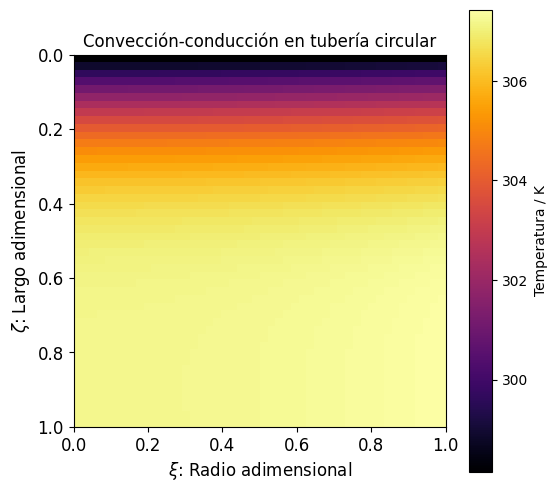

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(np.transpose(T), origin="upper", extent =[0, 1, 1, 0], cmap = "inferno")
plt.colorbar(label=r"Temperatura / K")
plt.xlabel(r'$\xi$: Radio adimensional', size = 12)
plt.ylabel(r'$\zeta$: Largo adimensional', size = 12)
plt.tick_params(labelsize=12)
plt.title('Convección-conducción en tubería circular')
plt.show()

Se puede observar un perfil bidimensional de temperatura, en donde la temperatura máxima se alcanza en la intersección del plano de salida de la tubería y la pared del tanque. 

Para comprender mejor la variación de los perfiles de temperatura, se graficará el perfil de temperatura en función del radio en distintas secciones transversales al flujo. Esto implica graficar un perfil radial para un valor de coordenada axial, $z$, dado.

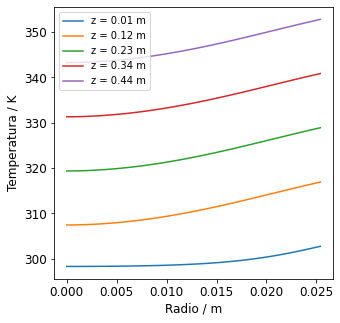

In [ ]:
# Se crea una nueva figura
plt.figure(figsize=[5,5])

# Se grafica un perfil para espaciamientos igual a 10*dz

for i in range(1,len(z),10):
    plt.plot(r, T[:,i], label="z = %.2f m"%z[i])

# Títulos de ejes y estética
plt.xlabel('Radio / m', size = 12)
plt.ylabel('Temperatura / K', size = 12)
plt.tick_params(labelsize=12)

# Generación de leyendas
plt.legend()

plt.show()

Escogimos un número de Reynolds lo suficientemente bajo para que el perfil se desarrolle completamente. Observamos que a medida que la distancia desde el inicio aumenta, los perfiles de temperatura tienen la misma forma y se desplazan linealmente hacia arriba.

### Desafío:
Implemente la solución analítica al perfil de temperatura obtenida en la Clase 12 y compárela con la solución numérica derivada en este Notebook.

## Referencias

https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/6_Solving_PDEs_SOR.html

Stability of Successive Over Relaxation: https://en.wikipedia.org/wiki/Successive_over-relaxation